# Internet Firewall Analysis model :-

In [1]:
# packages

# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning/H2O
import h2o
from h2o.estimators import H2ORandomForestEstimator

In [2]:
# load data
df = pd.read_csv('C:\\Users\\Nishar Ansari\\Desktop\\Firewall_Analysis.csv')
df.head() 

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [3]:
# structure of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


### Target Distribution :- 

Absolute Frequencies:
Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64

Percentages:
Action
allow         0.574376
deny          0.228697
drop          0.196103
reset-both    0.000824
Name: proportion, dtype: float64


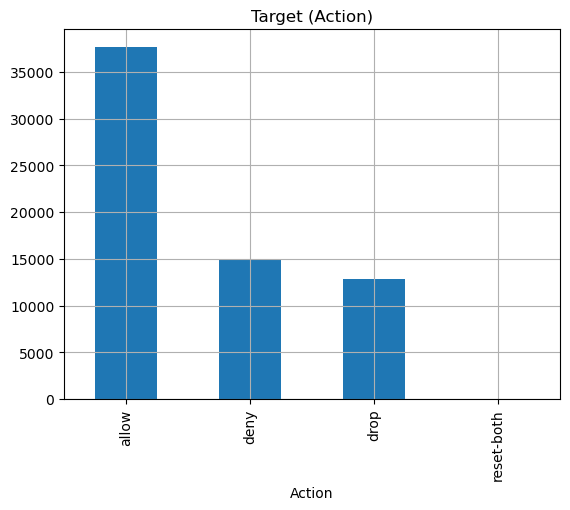

In [4]:
# target distribution
print('Absolute Frequencies:')
print(df.Action.value_counts())
print()

print('Percentages:')
print(df.Action.value_counts(normalize=True))

df.Action.value_counts().plot(kind='bar')
plt.title('Target (Action)')
plt.grid()
plt.show()

In [5]:
features_num = ['Bytes', 'Bytes Sent', 'Bytes Received',
                'Packets', 'Elapsed Time (sec)', 
                'pkts_sent', 'pkts_received']

In [6]:
# define log trafo for numerical features
def num_trafo(x):
    return np.log10(1+x)

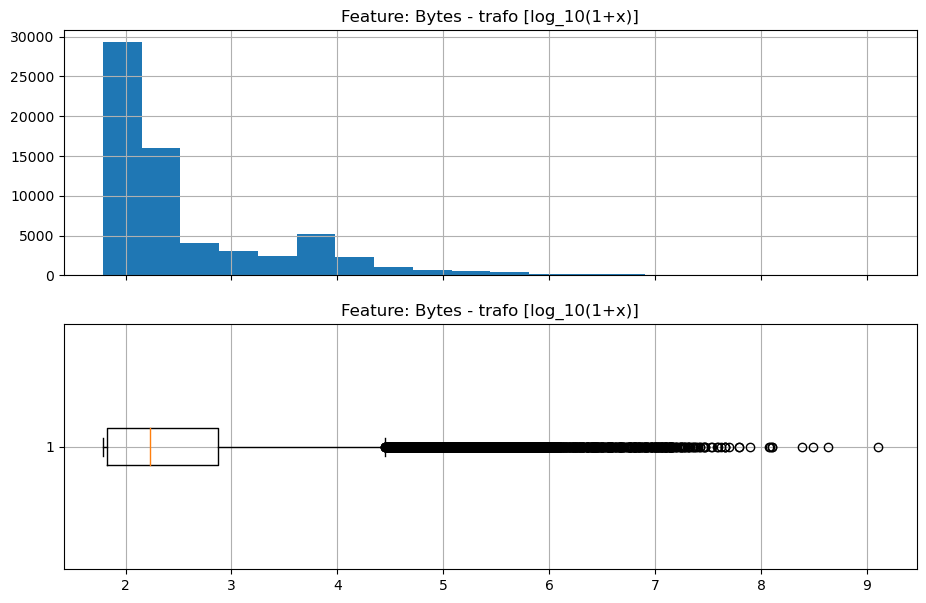

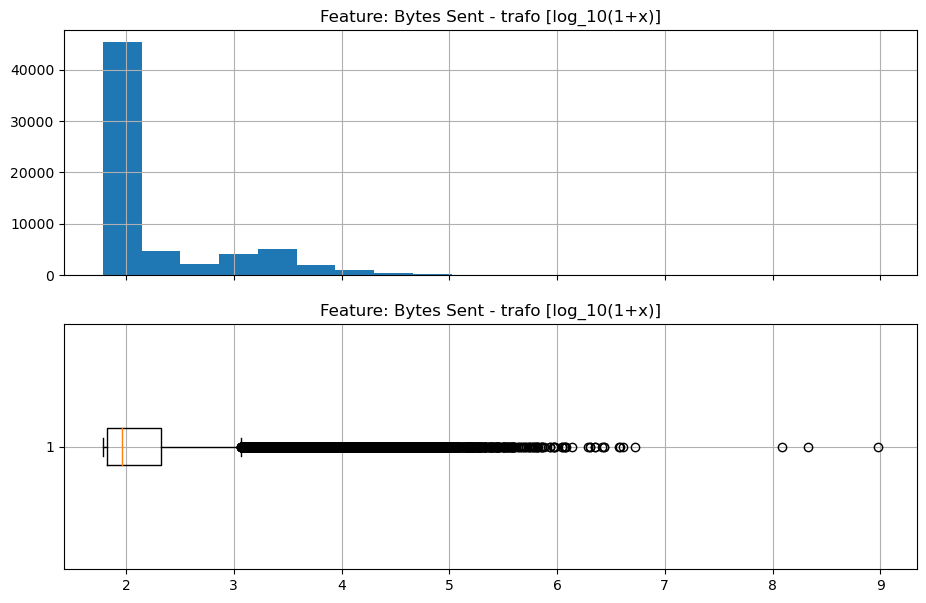

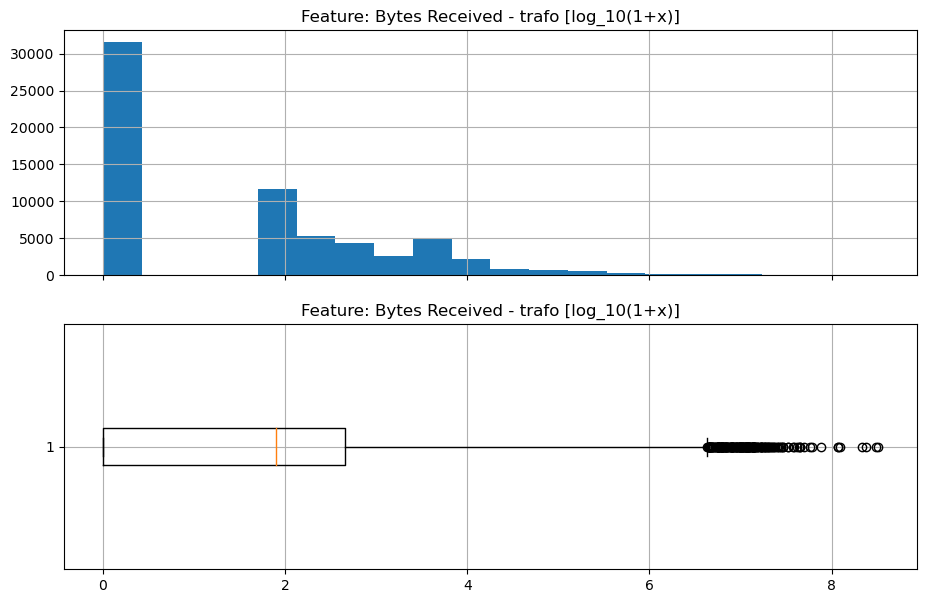

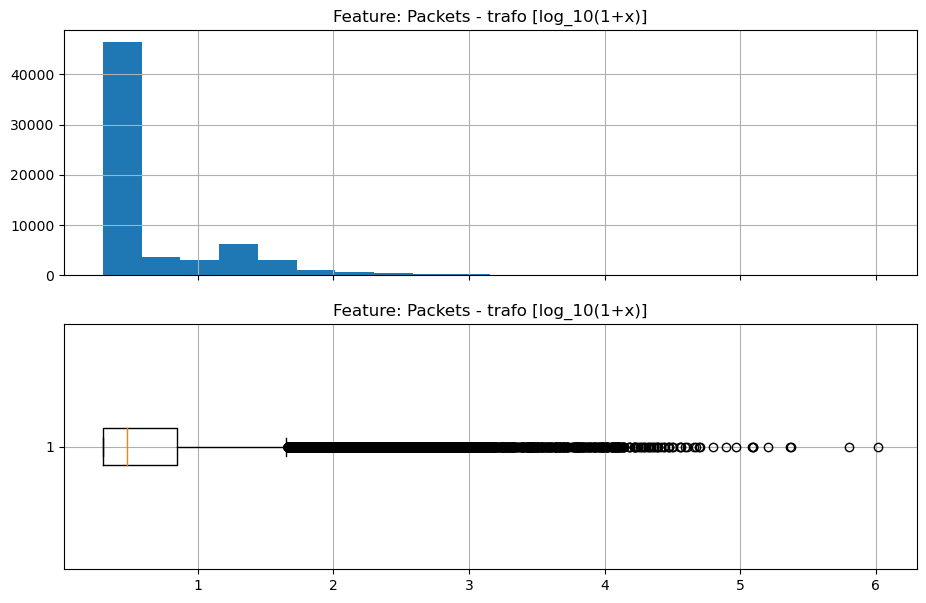

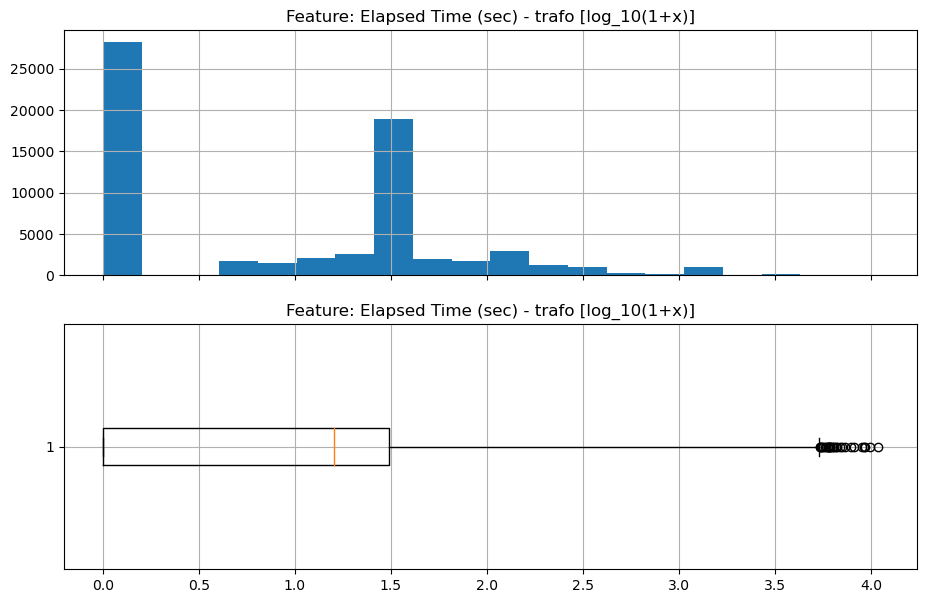

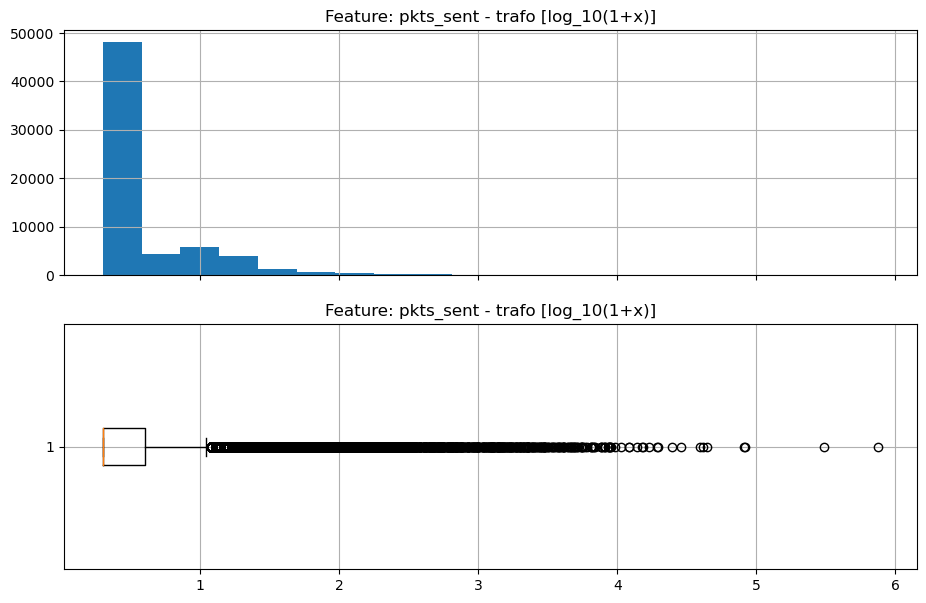

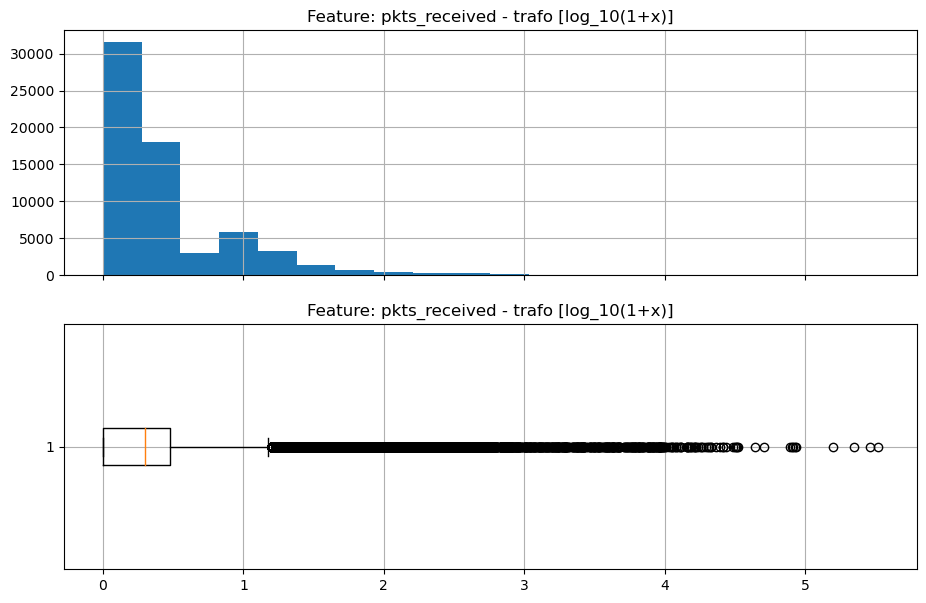

In [7]:
# plot distribution of numerical features
for f in features_num:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11,7), sharex=True)
    ax1.hist(num_trafo(df[f]), bins=20)
    ax1.grid()
    ax1.set_title('Feature: ' + f + ' - trafo [log_10(1+x)]')
    ax2.boxplot(num_trafo(df[f]), vert=False)
    ax2.grid()   
    ax2.set_title('Feature: ' + f + ' - trafo [log_10(1+x)]')
    plt.show()

In [8]:
features_cat = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']

Feature: Source Port
Source Port
58638    840
27005    513
443      273
57470    222
49418    210
6881     177
0        173
50584    116
3478     105
26900    102
Name: count, dtype: int64



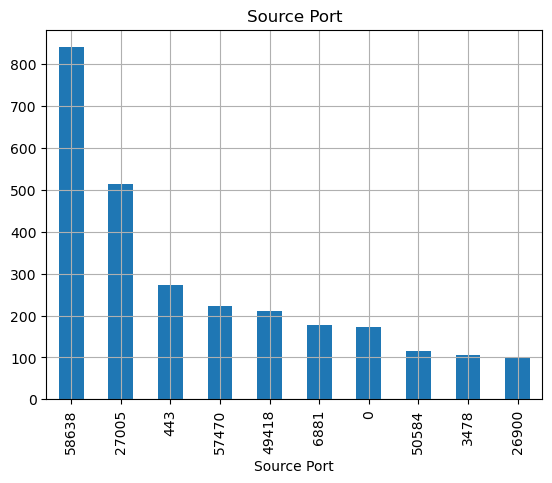

Feature: Destination Port
Destination Port
53       15414
445      12891
443      11684
80        4035
25174     1087
5900       909
37965      826
22114      767
64147      756
50584      717
Name: count, dtype: int64



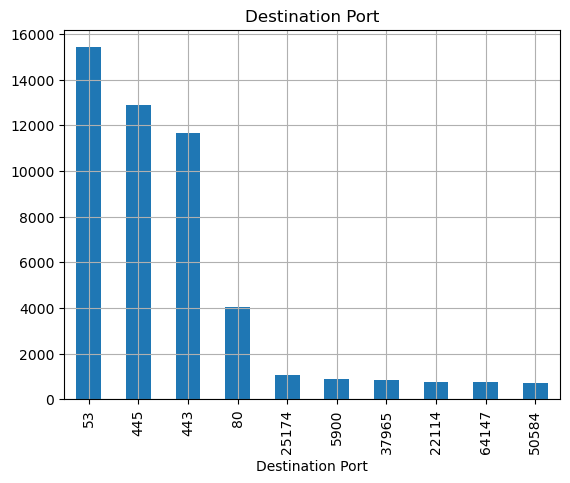

Feature: NAT Source Port
NAT Source Port
0        28432
48817       83
58638       51
50116       15
7986         5
30399        5
43757        5
57880        5
57596        5
60868        5
Name: count, dtype: int64



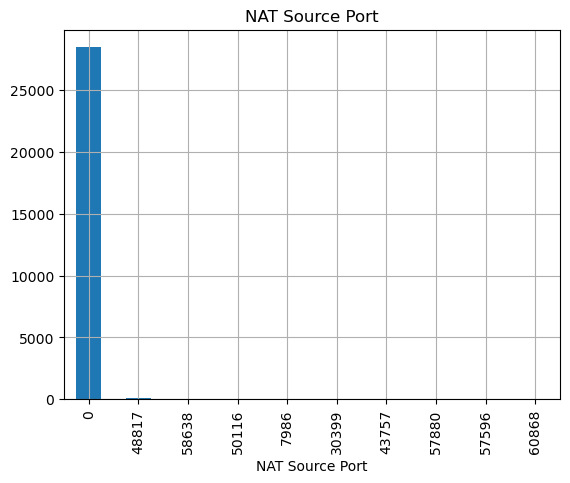

Feature: NAT Destination Port
NAT Destination Port
0        28432
53       15094
443      11678
80        4028
27015      234
27017      160
123        156
3389       156
6881       143
5228       100
Name: count, dtype: int64



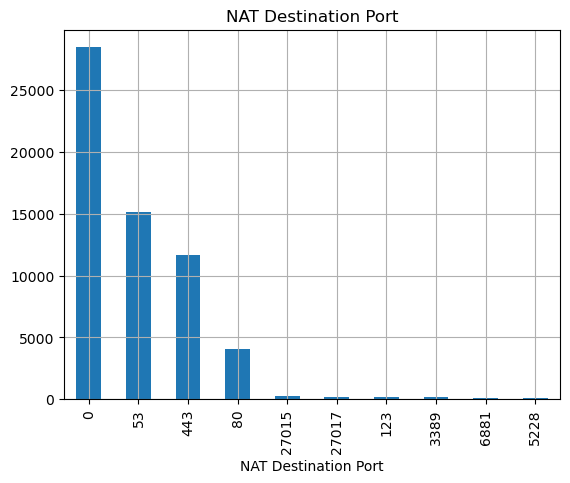

In [9]:
# show only top 10 levels for each feature
for f in features_cat:
    print('Feature:', f)
    print(df[f].value_counts()[0:10])
    print()
    df[f].value_counts()[0:10].plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

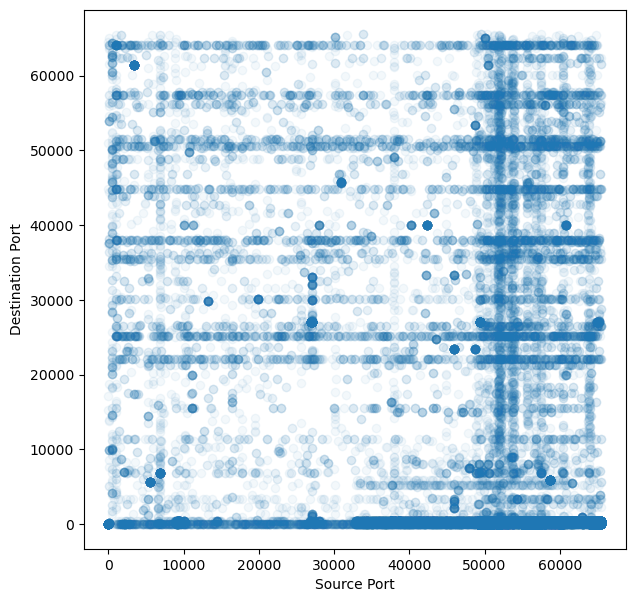

In [10]:
# Source/Destination
plt.figure(figsize=(7,7))
plt.scatter(df['Source Port'], df['Destination Port'], alpha=0.05)
plt.xlabel('Source Port')
plt.ylabel('Destination Port')
plt.show()


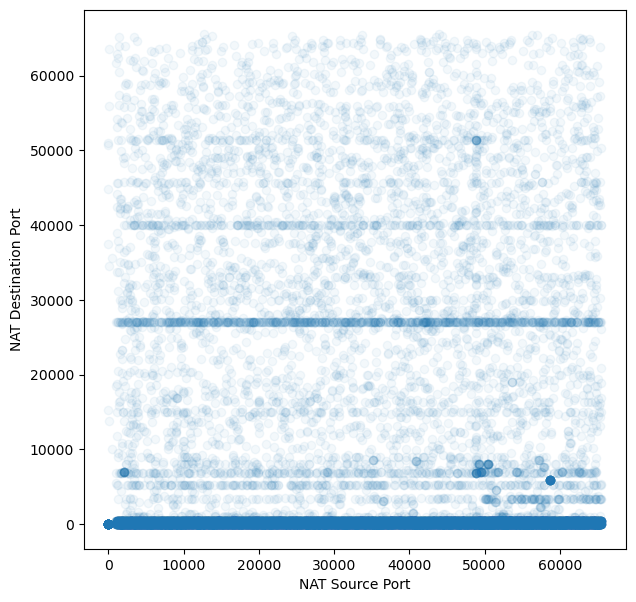

In [11]:
# Source/Destination NAT (Network Address Translation)
plt.figure(figsize=(7,7))
plt.scatter(df['NAT Source Port'], df['NAT Destination Port'], alpha=0.05)
plt.xlabel('NAT Source Port')
plt.ylabel('NAT Destination Port')
plt.show()

In [12]:
# add transformations of numerical features
for f in features_num:
    new_feature = f + '_trafo'
    df[new_feature] = num_trafo(df[f])
    
features_num_trafo = [f+'_trafo' for f in features_num]

Feature:Source Port - Top 10 levels only


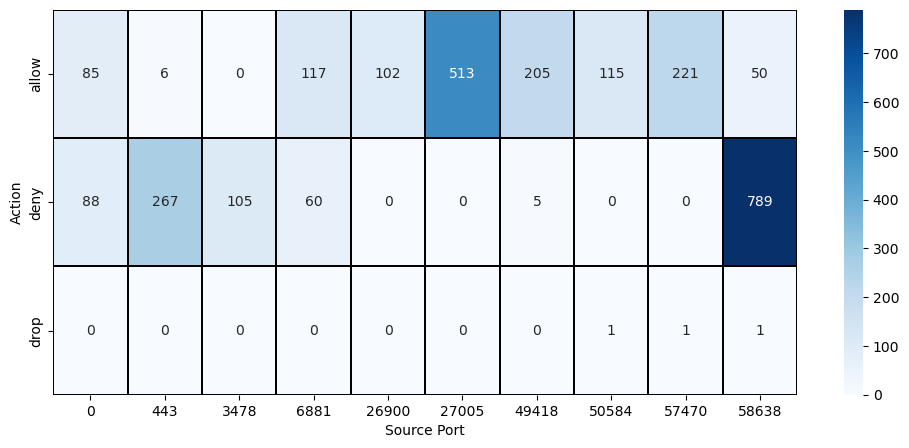

Feature:Destination Port - Top 10 levels only


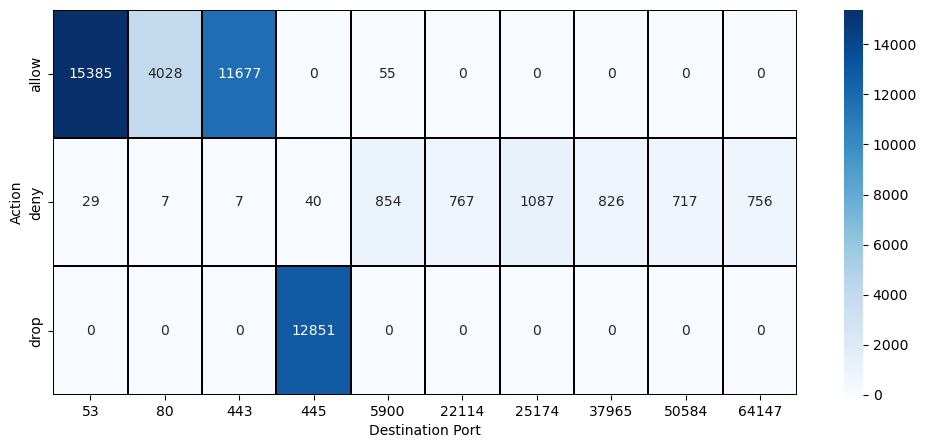

Feature:NAT Source Port - Top 10 levels only


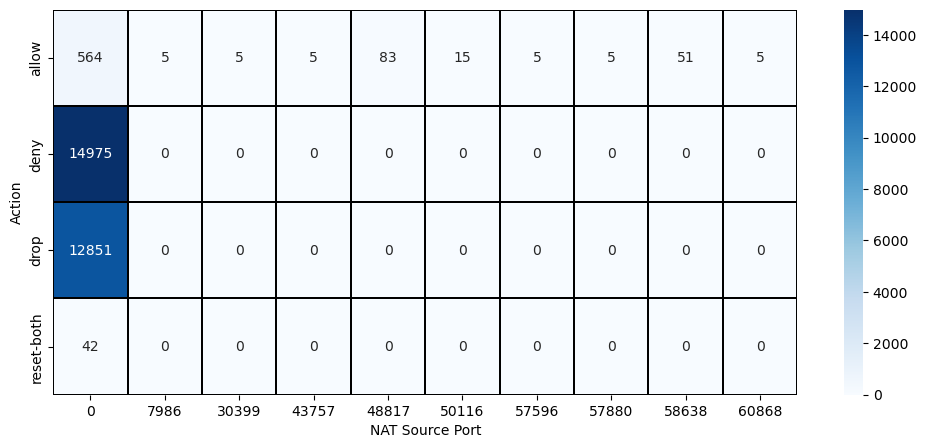

Feature:NAT Destination Port - Top 10 levels only


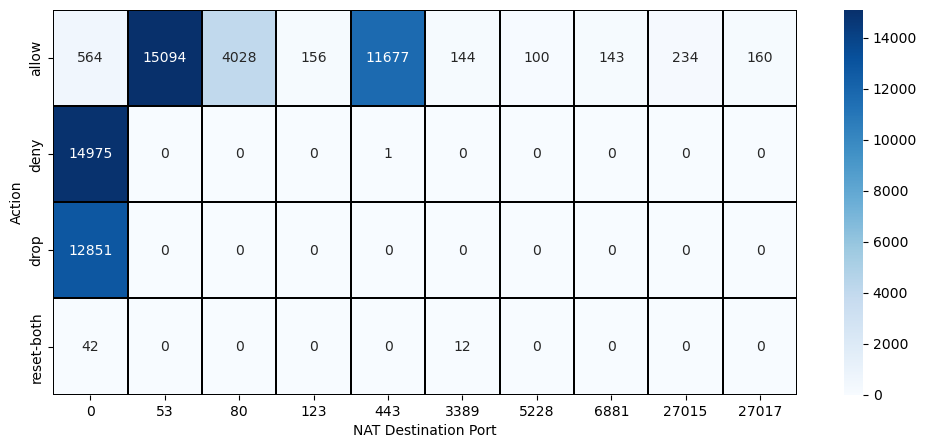

In [13]:
# visualize crosstable target vs feature (using top 10 levels only)
for f in features_cat:
    top10_levels = df[f].value_counts()[0:10].index.to_list()
    df_temp = df[df[f].isin(top10_levels)]
    ctab = pd.crosstab(df_temp.Action, df_temp[f])
    print('Feature:' + f + ' - Top 10 levels only')
    plt.figure(figsize=(12,5))
    sns.heatmap(ctab, annot=True, fmt='d', 
                cmap='Blues',
                linecolor='black',
                linewidths=0.1)
    plt.show()

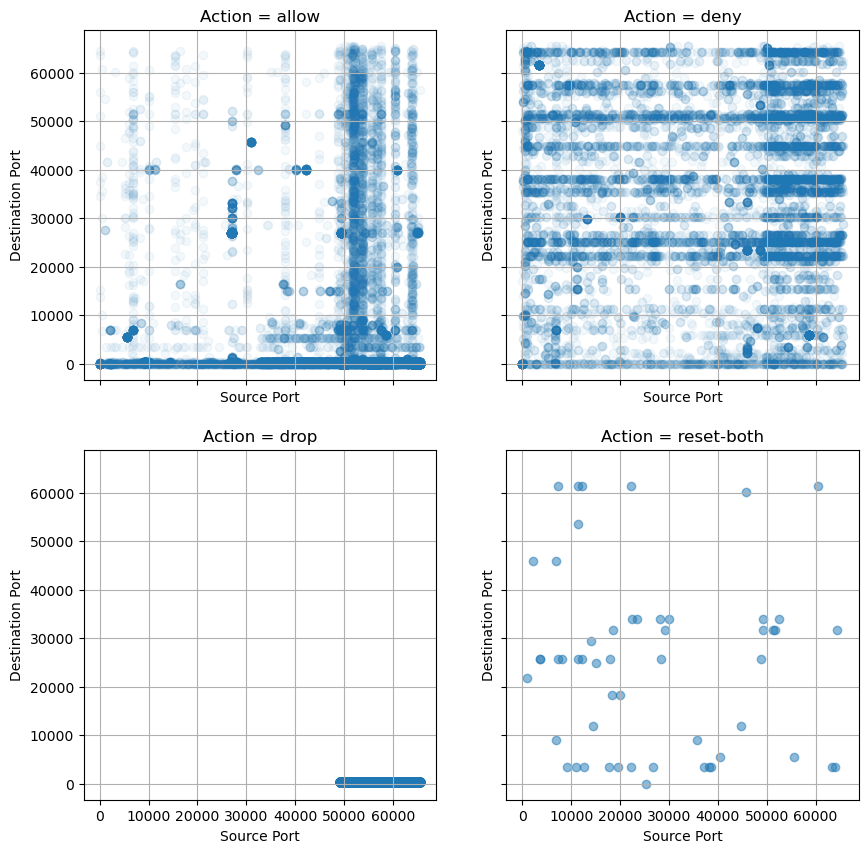

In [14]:
# source/destination plot by Action
xx = 'Source Port'
yy = 'Destination Port'

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,10))

df_temp = df[df.Action=='allow']
axs[0,0].scatter(df_temp[xx], df_temp[yy], alpha=0.05)
axs[0,0].set_title('Action = allow')
axs[0,0].set_xlabel(xx)
axs[0,0].set_ylabel(yy)
axs[0,0].grid()

df_temp = df[df.Action=='deny']
axs[0,1].scatter(df_temp[xx], df_temp[yy], alpha=0.05)
axs[0,1].set_title('Action = deny')
axs[0,1].set_xlabel(xx)
axs[0,1].set_ylabel(yy)
axs[0,1].grid()
df_temp = df[df.Action=='drop']
axs[1,0].scatter(df_temp[xx], df_temp[yy], alpha=0.5)
axs[1,0].set_title('Action = drop')
axs[1,0].set_xlabel(xx)
axs[1,0].set_ylabel(yy)
axs[1,0].grid()

df_temp = df[df.Action=='reset-both']
axs[1,1].scatter(df_temp[xx], df_temp[yy], alpha=0.5)
axs[1,1].set_title('Action = reset-both')
axs[1,1].set_xlabel(xx)
axs[1,1].set_ylabel(yy)
axs[1,1].grid()

plt.show()


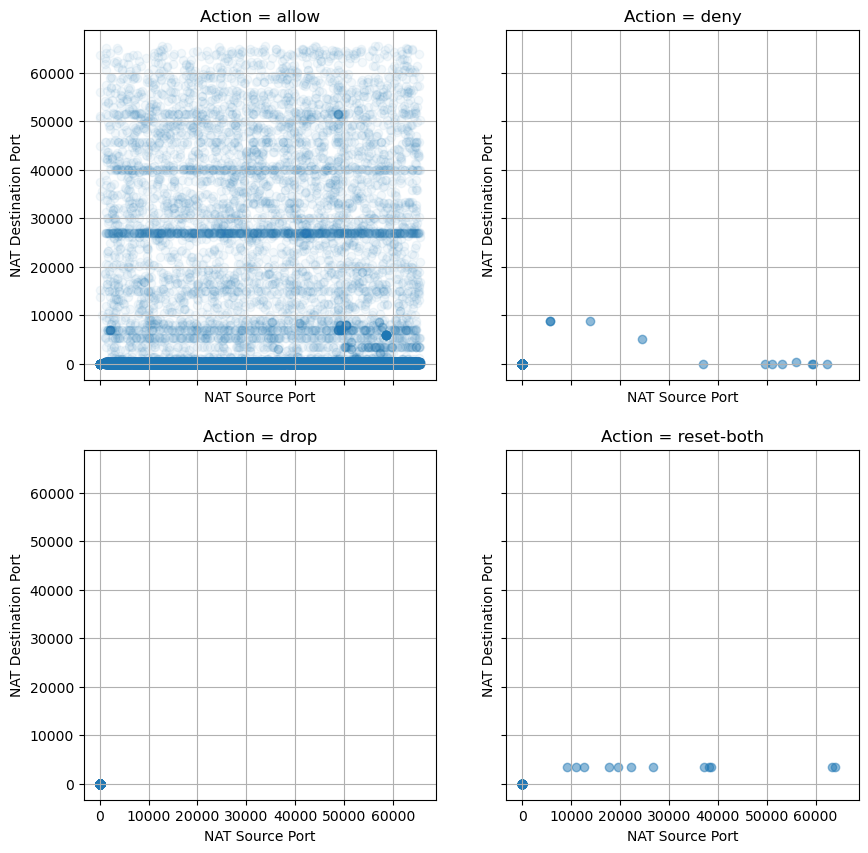

In [15]:
# source/destination plot by Action - NAT (Network Address Translation) version
xx = 'NAT Source Port'
yy = 'NAT Destination Port'

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,10))

df_temp = df[df.Action=='allow']
axs[0,0].scatter(df_temp[xx], df_temp[yy], alpha=0.05)
axs[0,0].set_title('Action = allow')
axs[0,0].set_xlabel(xx)
axs[0,0].set_ylabel(yy)
axs[0,0].grid()

df_temp = df[df.Action=='deny']
axs[0,1].scatter(df_temp[xx], df_temp[yy], alpha=0.5)
axs[0,1].set_title('Action = deny')
axs[0,1].set_xlabel(xx)
axs[0,1].set_ylabel(yy)
axs[0,1].grid()
df_temp = df[df.Action=='drop']
axs[1,0].scatter(df_temp[xx], df_temp[yy], alpha=0.5)
axs[1,0].set_title('Action = drop')
axs[1,0].set_xlabel(xx)
axs[1,0].set_ylabel(yy)
axs[1,0].grid()

df_temp = df[df.Action=='reset-both']
axs[1,1].scatter(df_temp[xx], df_temp[yy], alpha=0.5)
axs[1,1].set_title('Action = reset-both')
axs[1,1].set_xlabel(xx)
axs[1,1].set_ylabel(yy)
axs[1,1].grid()

plt.show()

In [16]:
# init H2O
h2o.init(max_mem_size='12G', nthreads=4)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 21.0.1+12-LTS-29, mixed mode, sharing)
  Starting server from C:\Users\Nishar Ansari\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\NISHAR~1\AppData\Local\Temp\tmpqv_sk0x0
  JVM stdout: C:\Users\NISHAR~1\AppData\Local\Temp\tmpqv_sk0x0\h2o_Nishar_Ansari_started_from_python.out
  JVM stderr: C:\Users\NISHAR~1\AppData\Local\Temp\tmpqv_sk0x0\h2o_Nishar_Ansari_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_Nishar_Ansari_itjomn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,11.98 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [17]:
# init H2O
h2o.init(max_mem_size='12G', nthreads=4)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,17 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_Nishar_Ansari_itjomn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,11.98 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [18]:
# upload data frame in H2O environment
t1 = time.time()
df_hex = h2o.H2OFrame(df)
t2 = time.time()
print('Elapsed time [s]: ', np.round(t2-t1,2))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Elapsed time [s]:  13.2


In [19]:
# define target
target = 'Action'
# select features
features = features_num_trafo + features_cat
print('Features used:', features)
# explicitly convert target to categorical => classification problem
df_hex[target] = df_hex[target].asfactor()

Features used: ['Bytes_trafo', 'Bytes Sent_trafo', 'Bytes Received_trafo', 'Packets_trafo', 'Elapsed Time (sec)_trafo', 'pkts_sent_trafo', 'pkts_received_trafo', 'Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']


In [20]:
# train / test split
train_perc = 0.7
train_hex, test_hex = df_hex.split_frame(ratios=[train_perc], seed=999)

In [21]:
# check target distribution in train set
train_hex[target].as_data_frame().value_counts()

Action    
allow         26365
deny          10506
drop           8956
reset-both       36
Name: count, dtype: int64

In [22]:
# check target distribution in test set
test_hex[target].as_data_frame().value_counts()

Action    
allow         11275
deny           4481
drop           3895
reset-both       18
Name: count, dtype: int64

In [23]:
# define (distributed) random forest model
n_cv = 5
fit_DRF = H2ORandomForestEstimator(ntrees=5,
                                   max_depth=20,
                                   min_rows=5,
                                   nfolds=n_cv,
                                   score_each_iteration=True,
                                   stopping_metric='logloss',
                                   stopping_rounds=5,
                                   stopping_tolerance=1e-4,
                                   seed=999)

# train model
t1 = time.time()
fit_DRF.train(x=features,
              y=target,
              training_frame=train_hex)
t2 = time.time()
print('Elapsed time [s]: ', np.round(t2-t1,2))

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Elapsed time [s]:  12.83


In [24]:
# cross validation metrics
fit_DRF.cross_validation_metrics_summary()

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.998102,0.0003875,0.9977204,0.9982512,0.9985966,0.9982483,0.9976936
auc,nan,0.0,nan,nan,nan,nan,nan
err,0.0018980,0.0003875,0.0022796,0.0017488,0.0014034,0.0017517,0.0023064
err_count,17.4,3.5071356,21.0,16.0,13.0,16.0,21.0
logloss,0.0367962,0.0040702,0.0404415,0.0331276,0.0342370,0.0342379,0.0419367
max_per_class_error,1.0,0.0,1.0,1.0,1.0,1.0,1.0
mean_per_class_accuracy,0.7489259,0.0003603,0.7492013,0.7489021,0.7493697,0.7486225,0.7485338
mean_per_class_error,0.2510741,0.0003603,0.2507987,0.2510980,0.2506303,0.2513775,0.2514662
mse,0.0051718,0.0004621,0.0055067,0.0048523,0.0048239,0.0048565,0.0058195
pr_auc,nan,0.0,nan,nan,nan,nan,nan


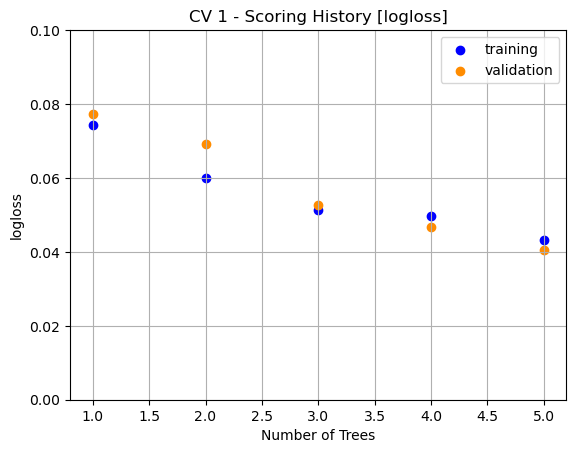

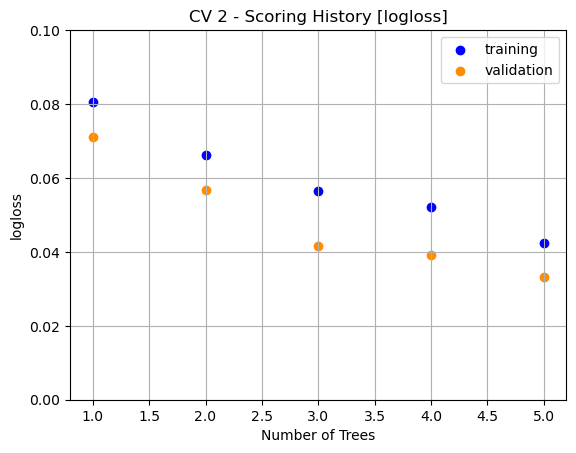

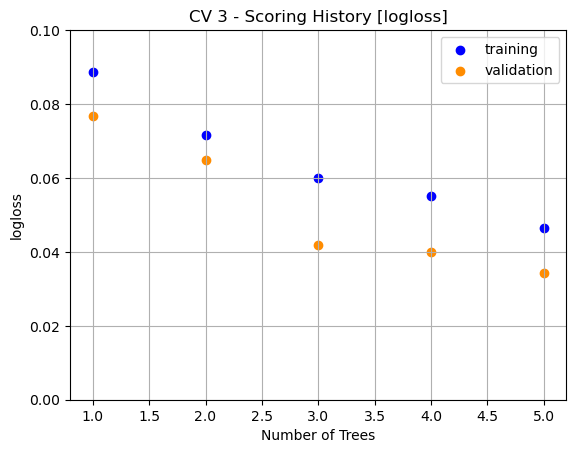

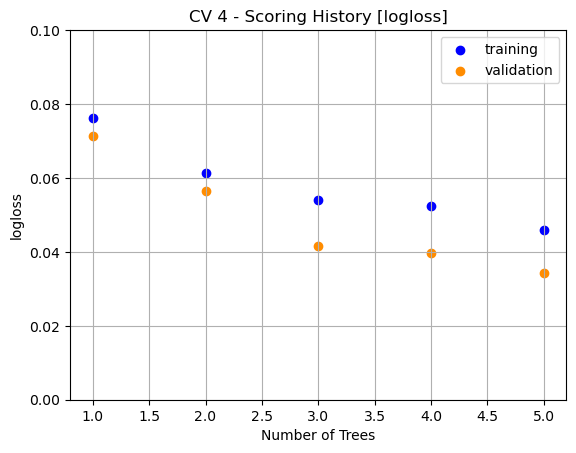

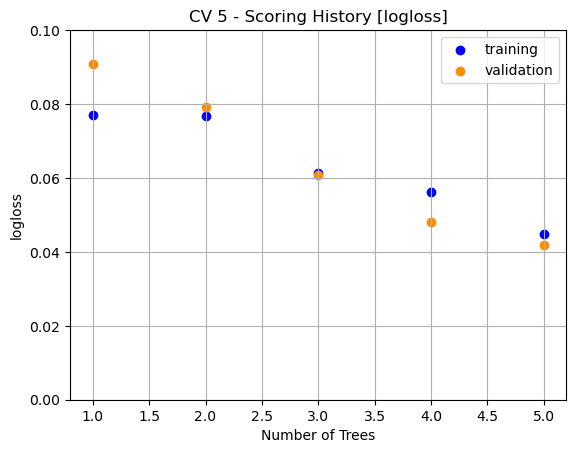

In [25]:
# show scoring history - training vs cross validations
for i in range(n_cv):
    cv_model_temp = fit_DRF.cross_validation_models()[i]
    df_cv_score_history = cv_model_temp.score_history()
    my_title = 'CV ' + str(1+i) + ' - Scoring History [logloss]'
    plt.scatter(df_cv_score_history.number_of_trees,
                y=df_cv_score_history.training_logloss, 
                c='blue', label='training')
    plt.scatter(df_cv_score_history.number_of_trees,
                y=df_cv_score_history.validation_logloss, 
                c='darkorange', label='validation')
    plt.title(my_title)
    plt.xlabel('Number of Trees')
    plt.ylabel('logloss')
    plt.ylim(0,0.1)
    plt.legend()
    plt.grid()
    plt.show()

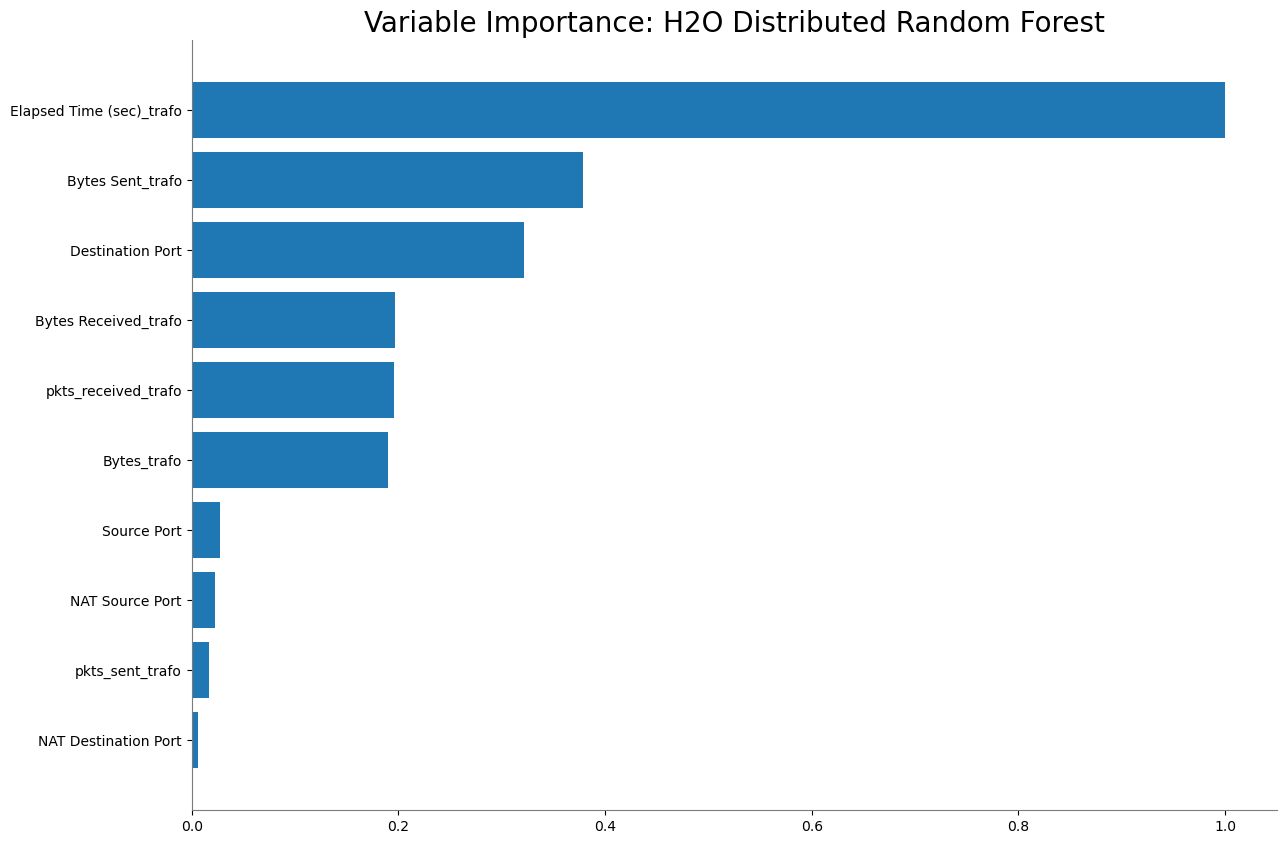

<Figure size 640x480 with 0 Axes>

In [26]:
# variable importance
fit_DRF.varimp_plot()

In [27]:
# predict on training set
pred_train = fit_DRF.predict(train_hex)
# add actual target
pred_train['target'] = train_hex[target]
pred_train = pred_train.as_data_frame()
# preview
pred_train.head()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,predict,allow,deny,drop,reset-both,target
0,allow,1.0,0.0,0.0,0.0,allow
1,allow,1.0,0.0,0.0,0.0,allow
2,allow,1.0,0.0,0.0,0.0,allow
3,allow,1.0,0.0,0.0,0.0,allow
4,allow,1.0,0.0,0.0,0.0,allow


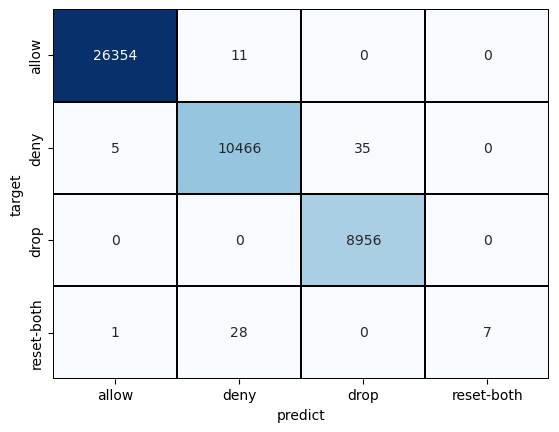

In [28]:
# confusion matrix; rows ~ actual observations, cols ~ predictions
conf_train = pd.crosstab(pred_train['target'], pred_train['predict'])
# visualize
sns.heatmap(conf_train, cmap='Blues', annot=True, 
            cbar=False, fmt='d',
            linecolor='black',
            linewidths=0.1)
plt.show()

In [29]:
# predict
pred_test = fit_DRF.predict(test_hex)
# add actual target
pred_test['target'] = test_hex[target]
pred_test = pred_test.as_data_frame()
pred_test.head()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,predict,allow,deny,drop,reset-both,target
0,allow,1.0,0.0,0.0,0.0,allow
1,allow,1.0,0.0,0.0,0.0,allow
2,allow,1.0,0.0,0.0,0.0,allow
3,allow,1.0,0.0,0.0,0.0,allow
4,allow,1.0,0.0,0.0,0.0,allow


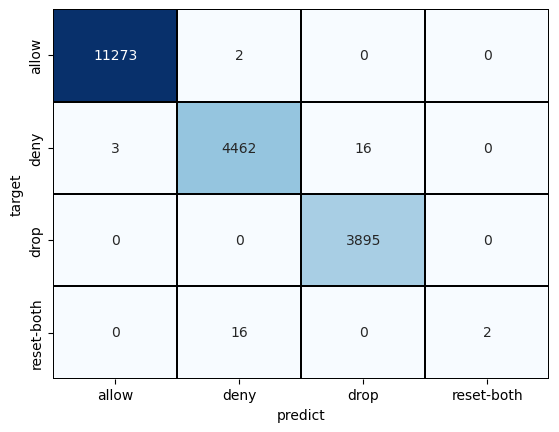

In [31]:
# confusion matrix; rows ~ actual observations, cols ~ predictions
conf_test = pd.crosstab(pred_test['target'], pred_test['predict'])
# visualize
sns.heatmap(conf_test, cmap='Blues', annot=True, 
            cbar=False, fmt='d',
            linecolor='black',
            linewidths=0.1)
plt.show()
